In [161]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [162]:
df = pd.read_csv('../Live.csv')
df.head(3)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN


In [163]:
df.drop(['status_id' ,'Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df.head(3)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0


<Axes: xlabel='status_type'>

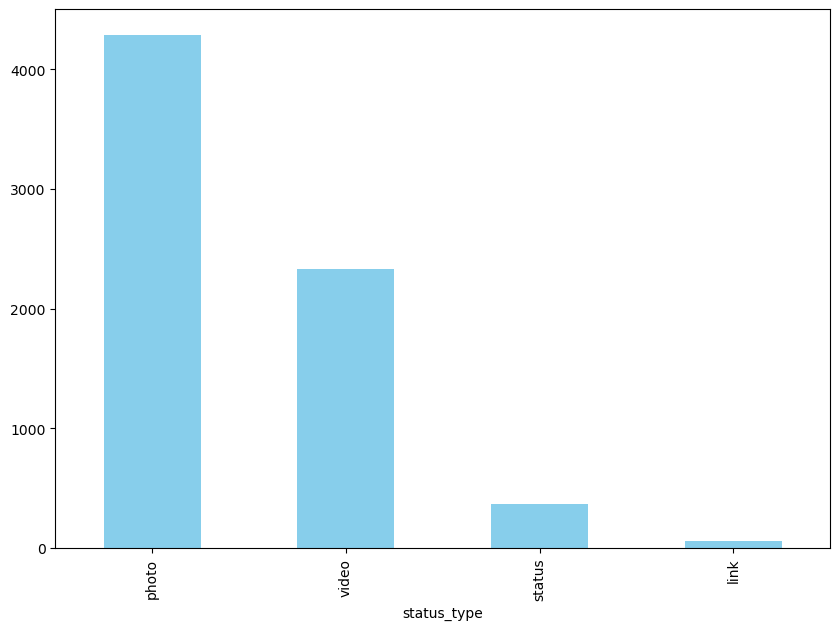

In [164]:
df.status_type.value_counts().plot(kind='bar', color='skyblue', figsize=(10, 7))

In [165]:
#status_type'ın içerisindeki link ve status satırlarını siliyoruz
df = df[df.status_type != 'link']
df = df[df.status_type != 'status']

In [166]:
df.isna().sum()

status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [167]:
X = df.drop('status_type', axis=1)

y = df['status_type']

In [168]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)



In [169]:
df.head(3)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6622 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       6622 non-null   object
 1   status_published  6622 non-null   object
 2   num_reactions     6622 non-null   int64 
 3   num_comments      6622 non-null   int64 
 4   num_shares        6622 non-null   int64 
 5   num_likes         6622 non-null   int64 
 6   num_loves         6622 non-null   int64 
 7   num_wows          6622 non-null   int64 
 8   num_hahas         6622 non-null   int64 
 9   num_sads          6622 non-null   int64 
 10  num_angrys        6622 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 620.8+ KB


In [171]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X.drop('status_published', axis=1))
scaled_df = pd.DataFrame(X, columns=['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'])

In [172]:
scaled_df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


Text(0, 0.5, 'Second principle component')

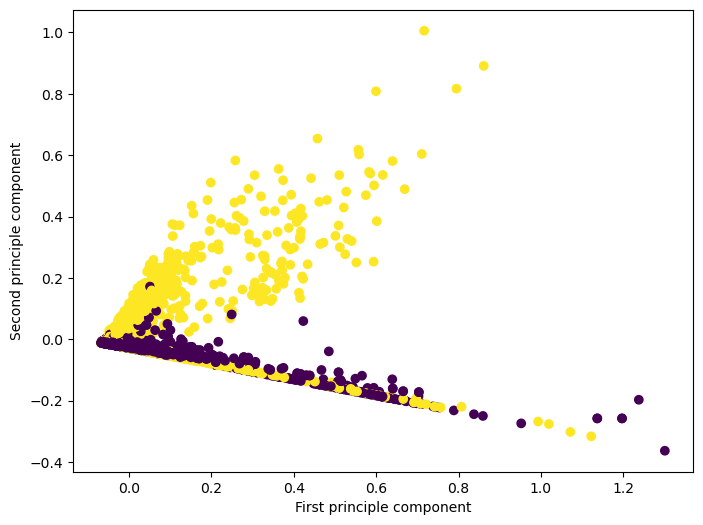

In [173]:
# görselleştirme ve K means algoritması
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')




In [174]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

# 3 boyutlu görselleştirme ve K means algoritması
pca = PCA(n_components=3)

X_pca = pca.fit_transform(X)



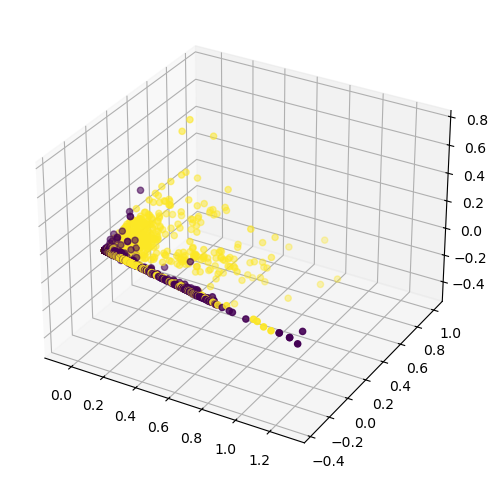

In [175]:
# 3 boyutlu görselleştirme
pca = PCA(n_components=3)

X_pca = pca.fit_transform(X)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# verileri ekle
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, cmap='viridis')


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

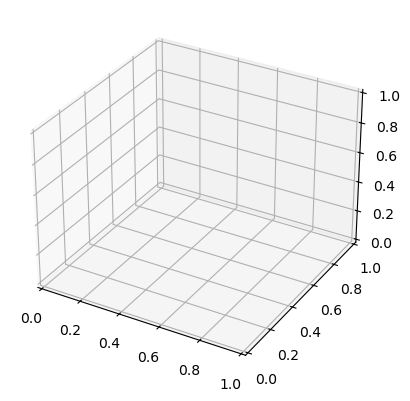

In [176]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Veri noktalarını çiz
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2])

# Eksen etiketlerini ayarla
ax.set_xlabel('Column 1')
ax.set_ylabel('Column 2')
ax.set_zlabel('Column 3')

# Grafiği göster
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

kmeans.fit(X_train)

print(kmeans.cluster_centers_)

print(kmeans.labels_)

c:\Users\Victus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.39416720e-02 1.22899762e-03 1.64023339e-03 1.34507214e-02
  2.64119517e-03 1.14574352e-03 9.21314429e-04 1.64201240e-03
  9.11020977e-04]
 [4.20327309e-01 2.62280284e-03 5.39954389e-03 4.19046313e-01
  5.52751742e-03 7.41798905e-03 1.79806784e-03 1.03199174e-03
  1.54344806e-04]
 [2.74469214e-01 1.60916370e-01 2.06840290e-01 2.12830720e-01
  3.65882215e-01 1.18117045e-01 8.15776580e-02 4.60030166e-02
  6.26550868e-02]
 [8.18888051e-02 4.35001943e-02 4.30641806e-02 7.11669367e-02
  6.86967609e-02 7.12719298e-03 1.46105710e-02 1.41038872e-02
  1.17076967e-02]]
[0 0 0 ... 0 0 3]


(300, 2)


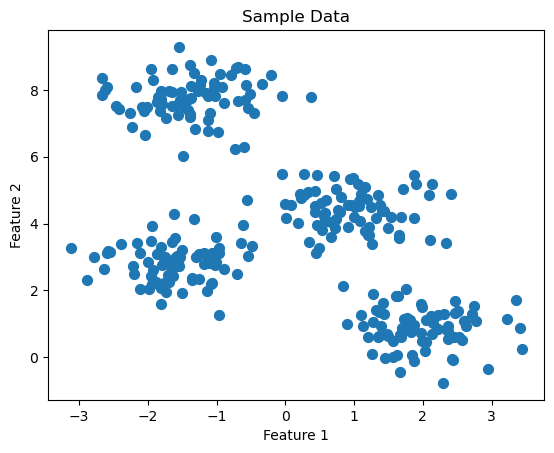

            0         1
0    0.836857  2.136359
1   -1.413658  7.409623
2    1.155213  5.099619
3   -1.018616  7.814915
4    1.271351  1.892542
..        ...       ...
295  1.973698  1.579798
296  2.518342  1.391766
297  0.438990  4.535929
298  0.369479  7.791105
299 -1.791458  2.749669

[300 rows x 2 columns]


c:\Users\Victus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Victus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,0,1
0,1.000000,-0.539387
1,-0.539387,1.000000


In [187]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Örnek veri kümesi oluşturma
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

print(X.shape)


# Veriyi görselleştirme
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Sample Data")
plt.show()

df = pd.DataFrame(X)
print(df)

# K-Means modelini oluşturma
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Küme merkezlerini ve etiketlerini al
centers = kmeans.cluster_centers_
labels = kmeans.labels_

df = pd.DataFrame(X)
df.corr()


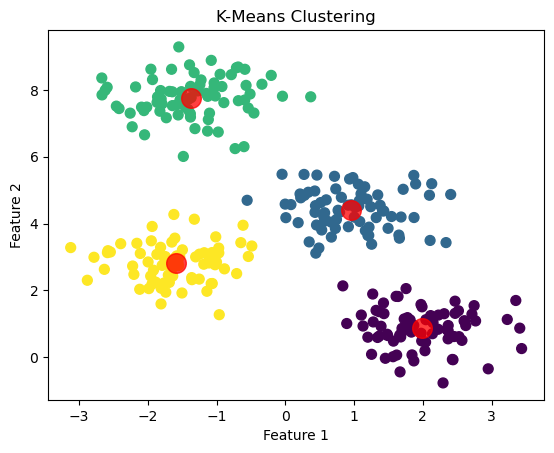

In [188]:
# Küme merkezlerini ve veriyi görselleştirme
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")
plt.show()

In [181]:
labels

array([1, 0, 2, 0, 1, 1, 3, 2, 0, 0, 3, 0, 2, 0, 1, 2, 2, 1, 3, 3, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 1, 2, 3, 2, 2,
       3, 3, 0, 3, 0, 1, 3, 1, 0, 1, 1, 3, 0, 3, 0, 1, 0, 2, 0, 3, 3, 3,
       0, 1, 0, 3, 2, 3, 0, 3, 3, 0, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2,
       0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 2, 3, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2,
       3, 3, 1, 0, 1, 2, 0, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 0, 3,
       3, 1, 0, 3, 3, 0, 2, 0, 0, 3, 2, 3, 2, 3, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 3, 0, 3, 1, 2, 0, 2, 2, 1, 2, 3, 3, 2, 1, 2, 2, 0, 1, 2, 3, 0,
       1, 1, 2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 0, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 0, 2, 3, 1, 3, 2, 0, 3, 0, 2, 0, 2, 3, 2, 2, 0, 3, 3, 1, 1, 2,
       0, 1, 1, 3, 1, 3, 2, 0, 0, 2, 2, 0, 2, 1, 3, 2, 1, 3, 0, 3, 1, 2,
       1, 0, 0, 0, 0, 3, 3, 0, 2, 3, 1, 2, 3, 3, 3, 1, 1, 0, 2, 2, 3, 1,
       0, 3, 2, 0, 2, 1, 1, 3, 3, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1,
       0, 3, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 3])

In [179]:

df

,0,1,2,3,4,5,6,7,8
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
6617,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
6618,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
6619,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
6620,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [ ]:
# test etme
y_pred = kmeans.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(X, kmeans.labels_)

from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_score(X, kmeans.labels_)

ValueError: X has 9 features, but KMeans is expecting 2 features as input.